In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# df = DataFrame({'sex':['man','man','women','women','man','women','man','women','women'],
#                'age':[15,23,25,17,35,57,24,31,22],
#                'smoke':[True,False,False,True,True,False,False,True,False],
#                'height':[168,179,181,166,173,178,188,190,160]})
df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6]})

In [3]:
df

,bar,baz,foo
0,A,1,one
1,B,2,one
2,C,3,one
3,A,4,two
4,B,5,two
5,C,6,two


In [4]:
df.pivot_table(index='smoke',columns='sex',aggfunc=max)

KeyError: 'smoke'

In [6]:
df.pivot(index='bar',columns='foo',values='baz')

foo,one,two
bar,,
A,1,4
B,2,5
C,3,6


### 透视表

各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中

行分组透视表 设置index参数

In [7]:
df.pivot(index='sex',columns=)

SyntaxError: invalid syntax (<ipython-input-7-c26cd9b19f1e>, line 1)

列分组透视表 设置columns参数

In [47]:
from pandas import pivot_table

In [46]:
df = DataFrame({'sex':['man','man','women','women','man','women','man','women','women'],
               'age':[15,23,25,17,35,57,24,31,22],
               'smoke':[True,False,False,True,True,False,False,True,False],
               'height':[168,179,181,166,173,178,188,190,160]})

In [51]:
pivot_table(df,values='age',index=['sex'],columns=['smoke'],aggfunc='min')

smoke,False,True
sex,,
man,23,15
women,22,17


行列分组的透视表  同时设定index、columns参数

aggfunc：设置应用在每个区域的聚合函数，默认值为np.mean

fill_value：替换结果中的缺失值

### 交叉表

是一种用于计算分组频率的特殊透视图,对数据进行汇总

pd.crosstab(index,colums)

- index:分组数据，交叉表的行索引
- columns:交叉表的列索引

In [52]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar","bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one","one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny","shiny", "dull", "shiny", "shiny", "shiny"],dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

In [54]:
table = pd.read_csv('stock2015-2016.csv')

In [ ]:
# 'AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO'

In [57]:
table['Ticker'].unique()

array(['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO'],
      dtype=object)

In [58]:
按照每天查看苹果股票的收盘价格

NameError: name '按照每天查看苹果股票的收盘价格' is not defined

In [62]:
adj_table = table.pivot(index='Date',columns='Ticker',values='Adj Close')

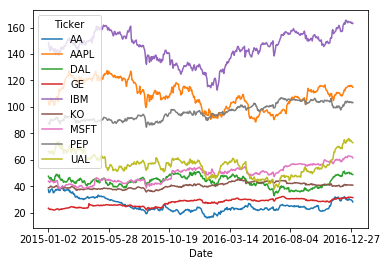

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
adj_table.plot()

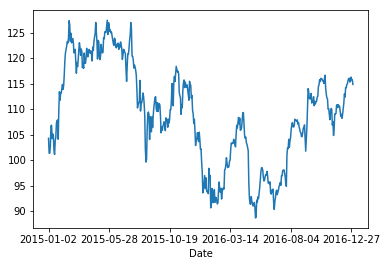

In [65]:
adj_table['AAPL'].plot()

In [66]:
table.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2015-01-02,106.239090,106.286781,102.385918,109.330002,104.274353,53204600
1,AAPL,2015-01-05,103.282440,103.625801,100.535622,106.250000,101.336784,64285500
2,AAPL,2015-01-06,101.613365,102.462219,99.791695,106.260002,101.346321,65797100
3,AAPL,2015-01-07,102.242828,103.196602,101.765961,107.750000,102.767426,40105900
4,AAPL,2015-01-08,104.178986,106.963943,103.673485,111.889999,106.715965,59364500


In [71]:
adj_table.head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2015-01-02,37.242073,104.274353,47.527554,23.302341,148.537659,38.834354,43.787056,87.929268,66.339996
2015-01-05,35.084465,101.336784,46.735104,22.874601,146.200409,38.834354,43.384392,87.268204,66.150002
2015-01-06,35.342445,101.346321,45.633408,22.381773,143.047470,39.129246,42.747623,86.607162,64.580002
2015-01-07,36.257072,102.767426,45.391804,22.391073,142.112564,39.617672,43.290749,89.139641,65.529999
2015-01-08,37.288967,106.715965,46.570816,22.660736,145.201385,40.096878,44.564281,90.759682,66.639999


In [72]:
table.groupby(['Ticker','Date'])['Adj Close'].mean().unstack(level=0).head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2015-01-02,37.242073,104.274353,47.527554,23.302341,148.537659,38.834354,43.787056,87.929268,66.339996
2015-01-05,35.084465,101.336784,46.735104,22.874601,146.200409,38.834354,43.384392,87.268204,66.150002
2015-01-06,35.342445,101.346321,45.633408,22.381773,143.047470,39.129246,42.747623,86.607162,64.580002
2015-01-07,36.257072,102.767426,45.391804,22.391073,142.112564,39.617672,43.290749,89.139641,65.529999
2015-01-08,37.288967,106.715965,46.570816,22.660736,145.201385,40.096878,44.564281,90.759682,66.639999
